In [20]:
# Imports
from sklearn.datasets import fetch_openml
from sklearn.multiclass import OneVsRestClassifier

from mnist_utils import *

In [21]:
# Fetch Data
mnist = fetch_openml('mnist_784', version=1)

In [22]:
pixel_features = mnist['data']
data_labels = mnist['target']

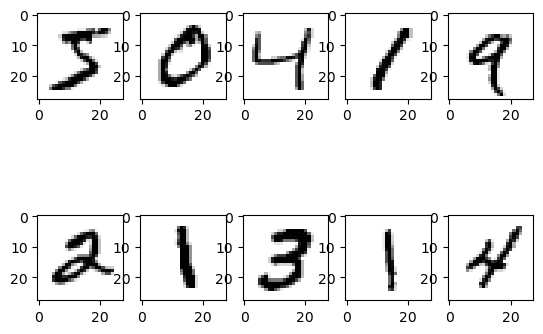

In [23]:
# View the Data
fig = plt.figure()
rows = 2
columns = 5
for i in range(rows * columns):
    fig.add_subplot(rows, columns, i + 1)
    # Each row corresponds to the pixels of the photo 
    # Need to reshape to a 28x28 array
    plt.imshow(pixel_features.iloc[i].to_numpy().reshape(28, 28), cmap='binary')

In [24]:
# Train, Holdout Set Split
x_train = pixel_features.sample(frac=0.90, random_state=13)
x_holdout = pixel_features.drop(x_train.index)
y_train = data_labels.iloc[x_train.index]
y_holdout = data_labels.drop(y_train.index)

In [25]:
from sklearn.svm import SVC

In [26]:
def one_vs_rest_multiclass(x_data, y_array):
    one_v_rest_model = OneVsRestClassifier(SVC())
    
    temp_preds = cross_val_predict(one_v_rest_model, x_data, y_array, cv=5)
    c_matrix = confusion_matrix(y_array, temp_preds)
    plt.matshow(c_matrix, cmap='plt.cm.gray')
    plt.show()


In [27]:
one_vs_rest_multiclass(x_data=x_train, y_array=y_train)

KeyboardInterrupt: 

In [ ]:
#TODO Holdout validation